<center><h3>Визуализация в Python. Пономарев Александр</h3></center><br>
В качестве источника были использованы данные об игроках NBA (https://www.kaggle.com/drgilermo/nba-players-stats)

In [1]:
# preparation
%pylab inline
%config InlineBackend.figure_format = 'svg' 

Populating the interactive namespace from numpy and matplotlib


In [2]:
# addinng necessary libs
from pylab import rcParams
rcParams['figure.figsize'] = 6,3

import pandas as pd

import seaborn as sns

import os.path

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [3]:
# check datasource files and load dataframes
if not os.path.isfile('player.csv') or not os.path.isfile('player_data.csv') or not os.path.isfile('seasons_stats.csv'):
    raise RuntimeError('No datasources in working dir')
else:
    print('Datasources are found. Loading dfs ...')

Datasources are found. Loading dfs ...


In [4]:
# loading dfs
players_data = pd.read_csv('player_data.csv')
players_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [5]:
seasons_info = pd.read_csv('seasons_stats.csv', index_col=0)
seasons_info.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


<center><h4>График 1. Позиции игроков (matplotlib bar chart)</h4></center><br>
На нижеприведенном графике отобразим все возможные позиции игроков и кол-во игроков, игравших на этих позициях за все время наблюдений

Text(0,0.5,'Number of players')

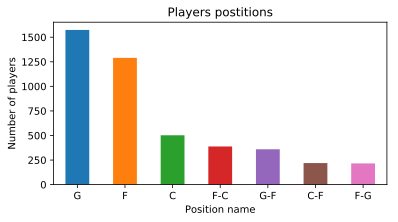

In [6]:
plot = players_data[ pd.isna(players_data['position']) != True ]['position']\
    .value_counts()\
    .plot(kind='bar', rot=0, title='Players postitions')

plot.set_xlabel('Position name')
plot.set_ylabel('Number of players')

<center><h4>График 2. График корреляции параметров (seaborn)</h4></center><br>
График №2 позволяет рассмотреть корреляцию таких параметров, как:
1. Год начала карьеры (year_start)
2. Время завершения карьеры (year_end)
3. Позиция игрока (position)
4. Колледж (college)

Однако, для проведения подобной операции необходимо закодировать номинальные данные (позиции игроков, а так же колледжи, в которых игрок обучался). В качестве алгоритма для кодирования будем использовать обычное нумерование
Цель данного графика посмотреть как в реальности располагаются параметры на плоскости.

In [7]:
# filter columns and valid data
columns = ['year_start', 'year_end', 'position', 'college']
corr_params = players_data[
    (pd.isna(players_data['position']) != True) & (pd.isna(players_data['college']) != True)
][columns]
corr_params.head()

,year_start,year_end,position,college
0,1991,1995,F-C,Duke University
1,1969,1978,C-F,Iowa State University
2,1970,1989,C,"University of California, Los Angeles"
3,1991,2001,G,Louisiana State University
4,1998,2003,F,San Jose State University


In [8]:
# make list of encoded colleges
colleges = corr_params['college'].unique()
encoded_colleges = dict(zip(colleges, range(len(colleges))))
corr_params['encoded_college'] = corr_params.apply(lambda row: encoded_colleges[row['college']], axis=1)\

# make list of encoded positions
positions = corr_params[ pd.isna(corr_params['position']) != True ]['position'].unique()
encoded_positions = dict(zip(positions, range(len(positions))))
corr_params['encoded_position'] = corr_params.apply(lambda row: encoded_positions[row['position']], axis=1)

In [9]:
corr_params.head()

,year_start,year_end,position,college,encoded_college,encoded_position
0,1991,1995,F-C,Duke University,0,0
1,1969,1978,C-F,Iowa State University,1,1
2,1970,1989,C,"University of California, Los Angeles",2,2
3,1991,2001,G,Louisiana State University,3,3
4,1998,2003,F,San Jose State University,4,4


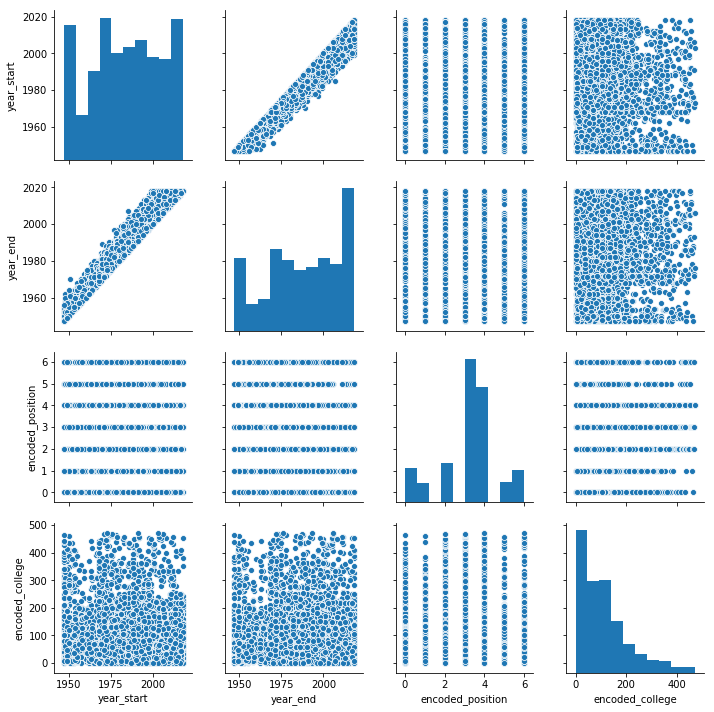

In [10]:
%config InlineBackend.figure_format = 'png'
corr_params = corr_params[['year_start', 'year_end', 'encoded_position', 'encoded_college']]
sns_plot = sns.pairplot(corr_params)
sns_plot.savefig('pairplot.png')

<center><h4>График 3. Correlation heatmap (seaborn)</h4></center><br>
Далее отобразим heatmap выбранных нами ранее параметров
1. Год начала карьеры (year_start)
2. Время завершения карьеры (year_end)
3. Позиция игрока (position)
4. Колледж (college)

Цель данного графика наглядно выделить зависимости параметров друг от друга

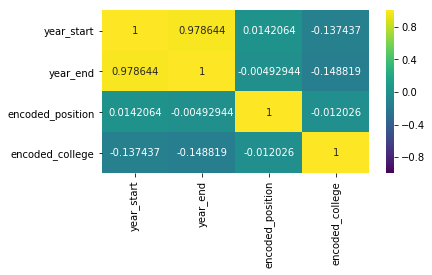

In [11]:
sns.heatmap(corr_params.corr(), annot=True, fmt="g", cmap='viridis', robust=True, vmax=1, vmin=-1)

<center><h4>График 4. Топ 20 игроков по результативности (plotly)</h4></center><br>
На данном графике отобразим рейтинг топ 20 игроков по результативности с помощью horizontal bar

In [12]:
mean_pts = seasons_info[['Player', 'PTS']].groupby('Player').agg({'PTS': ['mean']})
mean_pts['mean_pts'] = mean_pts['PTS']['mean']
mean_pts = mean_pts.drop('PTS', axis=1).reset_index()
top20 = mean_pts.sort_values(by='mean_pts', ascending=False).head(20)
top20.head()

,Player,mean_pts
,,
2684,Michael Jordan*,2152.800000
3883,Wilt Chamberlain*,2122.062500
1434,George Gervin*,2070.800000
2403,LeBron James,2056.214286
2186,Karl Malone*,1943.578947


In [13]:
init_notebook_mode(connected=True)

In [22]:
top20 = top20.sort_values(by='mean_pts')

trace = go.Bar(
    x=top20.mean_pts,
    y=top20.Player,
    orientation='h',
    name='Average NBA player perormance (top 20)'
)

layout = go.Layout(
    barmode='stack',
    yaxis=dict(
        tickangle=45
    )
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig, show_link=False)
# plotly.offline.plot(fig, show_link=False)

<center><h4>График 5. Результативность топ 5 самых результативных игроков по сезонам</h4></center><br>
График очень прост, он иллюстрирует результативность топ 5 игроков в каждом конкретном сезоне (топ выстроен по среднему числу очков, заработанных за всю карьеру)
Цель - понять, как изменялась результативность этих игроков за их карьеру

In [73]:
top5 = mean_pts.sort_values(by='mean_pts', ascending=False).head(5).Player.values
seasons_for_top5 = seasons_info[ seasons_info.apply(lambda row: row['Player'] in top5, axis=1) ]\
    [['Player', 'PTS', 'Year']]

traces = []
for player in top5:
    player_info = seasons_for_top5[ seasons_for_top5['Player'] == player ]
    trace = go.Scatter(
        x = player_info.Year,
        y = player_info.PTS,
        mode = 'lines+markers',
        name = player,
        marker = dict(
            size = 7
        )
    )
    traces.append(trace)

layout = go.Layout(
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='lightgrey'
        ),
        showticklabels=True,
        showline=True
    ),
    yaxis=dict(
        title='PTS',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='lightgrey'
        ),
        showticklabels=True,
        showline=True
    )
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig, show_link=False)

<center><h4>Спасибо за крутую презентацию!)) &lt;3</h4></center>